# Preparation
Loading Modules, Dataset, Preparing Data ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
import tensorflow as tf

In [2]:
!pip install tensorflow==2.12.0


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 28.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.__version__

'2.12.0'

In [4]:
tf.random.set_seed(42)


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  

#Reading the dataset
dataset = pd.read_csv("/content/drive/My Drive/EdgeAI/Data/fer2013.csv")


In [6]:
dataset

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [7]:
dataset["Usage"].value_counts()


,count
Usage,
Training,28709
PublicTest,3589
PrivateTest,3589


In [ ]:
train = dataset[dataset["Usage"] == "Training"]

val = dataset[dataset["Usage"] == "PublicTest"]

test = dataset[dataset["Usage"] == "PrivateTest"]

#Converting " " separated pixel values to list
train['pixels'] = train['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
val['pixels'] = val['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
test['pixels'] = test['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))

In [9]:
train

,emotion,pixels,Usage
0,0,"[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....",Training
1,0,"[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...",Training
2,2,"[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...",Training
3,4,"[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....",Training
4,6,"[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Training
...,...,...,...
28704,2,"[84.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85....",Training
28705,0,"[114.0, 112.0, 113.0, 113.0, 111.0, 111.0, 112...",Training
28706,4,"[74.0, 81.0, 87.0, 89.0, 95.0, 100.0, 98.0, 93...",Training
28707,0,"[222.0, 227.0, 203.0, 90.0, 86.0, 90.0, 84.0, ...",Training


In [10]:
X_train = train.iloc[:, 1].values
y_train = train.iloc[:, 0].values

X_val = val.iloc[:, 1].values
y_val = val.iloc[:, 0].values

X_test = test.iloc[:, 1].values
y_test = test.iloc[:, 0].values

'''
np.vstack stack element in sequence vertically (eg: [2, 3, 4] --> array([[2],
                                                                         [3],
                                                                         [4]])
                                               )
'''
X_train = np.vstack(X_train)
X_val = np.vstack(X_val)
X_test = np.vstack(X_test)

In [11]:
# Reshape pixels to recieve the original pictures:
X_train = np.reshape(X_train, (X_train.shape[0],48,48,1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

X_val = np.reshape(X_val, (X_val.shape[0],48,48,1))
y_val = np.reshape(y_val, (y_val.shape[0],1))

X_test = np.reshape(X_test, (X_test.shape[0],48,48,1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print("shape of X_train and y_train is " + str(X_train.shape) +" and " + str(y_train.shape) +" respectively.")
print("shape of X_val and y_val is " + str(X_val.shape) +" and " + str(y_val.shape) +" respectively.")
print("shape of X_test and y_test is " + str(X_test.shape) +" and " + str(y_test.shape) +" respectively.")


shape of X_train and y_train is (28709, 48, 48, 1) and (28709, 1) respectively.
shape of X_val and y_val is (3589, 48, 48, 1) and (3589, 1) respectively.
shape of X_test and y_test is (3589, 48, 48, 1) and (3589, 1) respectively.


In [ ]:
# Change to float32 datatype
train_data = X_train.astype('float32')
val_data = X_val.astype('float32')
test_data = X_test.astype('float32')

# normalize
train_data /= 255
val_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(y_train)
val_labels_one_hot = to_categorical(y_val)
test_labels_one_hot = to_categorical(y_test)

In [13]:
#Defining labels

def get_label(argument):
    labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad' , 5:'Surprise', 6:'Neutral'}
    return(labels.get(argument, "Invalid emotion"))

In [ ]:

classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

nRows,nCols,nDims = X_train.shape[1:]
input_shape = (nRows, nCols, nDims)

print('Input Shape: ', input_shape)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]
Input Shape:  (48, 48, 1)


Text(0.5, 1.0, 'Ground Truth : Happy')

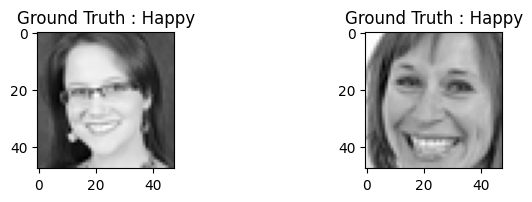

In [15]:
# resize plots
plt.figure(figsize=[6,4])

# Display random image from training data
plt.subplot(1,3,1)
plt.imshow(np.squeeze(X_train[7]), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_train[7]))))

# Display random image from testing data
plt.subplot(1,3,3)
plt.imshow(np.squeeze(X_test[1500]), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_test[1500]))))

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False)     # randomly flip images

datagen.fit(train_data)


# Training CNN Model:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def createModel(input_shape=(48, 48, 1), nClasses=7):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(nClasses, activation='softmax'))

    return model

model = createModel()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                        

In [ ]:

final_cnn_history = model.fit(train_data, train_labels_one_hot, batch_size=128, epochs=20, verbose=1,
                   validation_data=(val_data, val_labels_one_hot))

Epoch 1/20
225/225 [==============================] - 37s 166ms/step - loss: 1.3311 - accuracy: 0.4874 - val_loss: 1.3660 - val_accuracy: 0.4759
Epoch 2/20
225/225 [==============================] - 37s 166ms/step - loss: 1.2699 - accuracy: 0.5118 - val_loss: 1.2704 - val_accuracy: 0.5188
Epoch 3/20
225/225 [==============================] - 37s 166ms/step - loss: 1.2159 - accuracy: 0.5350 - val_loss: 1.2144 - val_accuracy: 0.5352
Epoch 4/20
225/225 [==============================] - 37s 165ms/step - loss: 1.1745 - accuracy: 0.5533 - val_loss: 1.1343 - val_accuracy: 0.5662
Epoch 5/20
225/225 [==============================] - 39s 174ms/step - loss: 1.1319 - accuracy: 0.5711 - val_loss: 1.1338 - val_accuracy: 0.5637
Epoch 6/20
225/225 [==============================] - 37s 165ms/step - loss: 1.1026 - accuracy: 0.5820 - val_loss: 1.1064 - val_accuracy: 0.5874
Epoch 7/20
225/225 [==============================] - 37s 166ms/step - loss: 1.0723 - accuracy: 0.5924 - val_loss: 1.0915 - val_ac

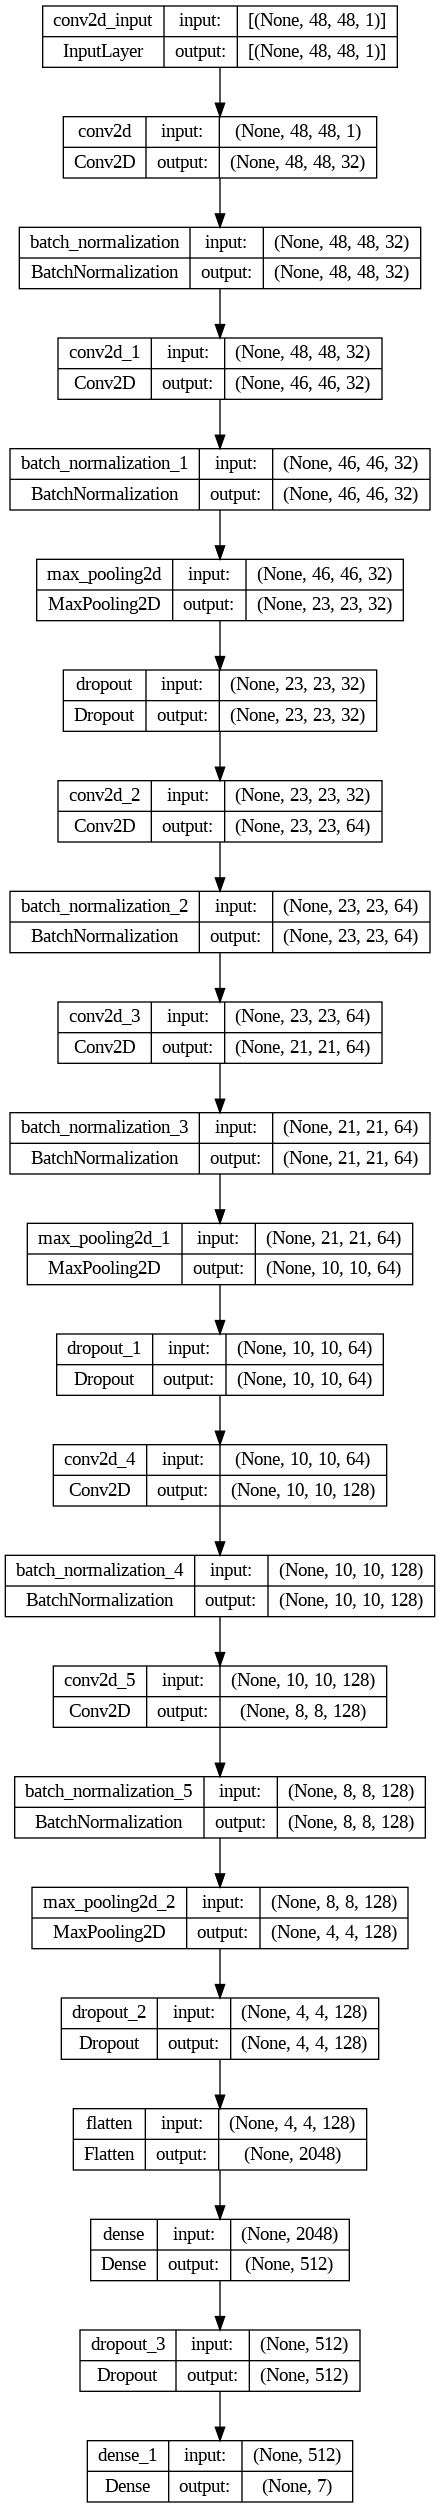

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="/content/drive/My Drive/EdgeAI/Results/emotion_architecture.png", show_shapes=True, show_layer_names=True)


In [ ]:

train_loss = final_cnn_history.history['loss']
val_loss = final_cnn_history.history['val_loss']
train_accuracy = final_cnn_history.history['accuracy']
val_accuracy = final_cnn_history.history['val_accuracy']

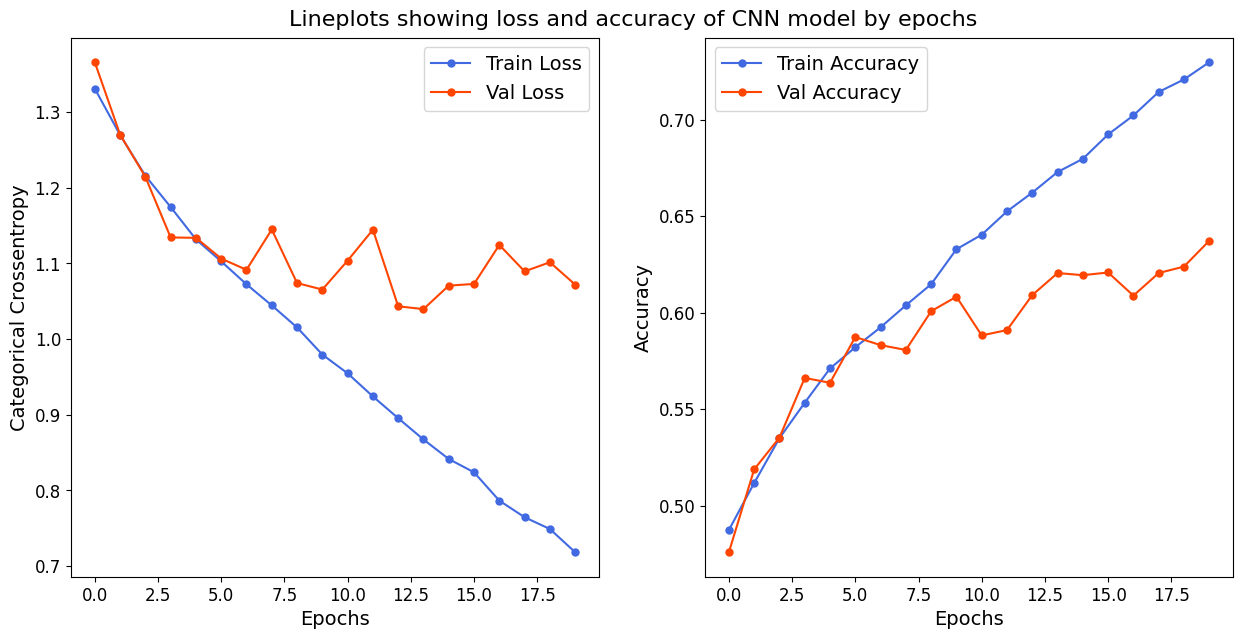

In [ ]:

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(val_loss, label='Val Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(val_accuracy, label='Val Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

plt.savefig('/content/drive/My Drive/EdgeAI/Results/Logs/tf12_emotion_final_cnn_loss_accuracy.png', bbox_inches='tight');

# Saving Models

In [ ]:
# as Keras file
model.save(f"/content/drive/My Drive/EdgeAI/Results/TFN3_final_tf12_emotion_model.keras")

In [ ]:
# as TF-Lite 

import tensorflow as tf

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)  
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open(f'/content/drive/My Drive/EdgeAI/Results/TFN3_final_tf12_emotion_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
# as Quantized Format

import tensorflow as tf

# Convert the model to TFLite with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enable dynamic range quantization
tflite_quantized_model = converter.convert()

# Save the quantized model to a .tflite file
with open('/content/drive/My Drive/EdgeAI/Results/TFN3_final_tf12_emotion_model_quantized.tflite', 'wb') as f:
    f.write(tflite_quantized_model)



# Testing Performance on Test Set

In [ ]:
#Keras Model

final_cnn_score = model.evaluate(test_data, test_labels_one_hot, verbose=1)

113/113 [==============================] - 2s 17ms/step - loss: 1.0632 - accuracy: 0.6439


In [ ]:
# tflite model


import tensorflow as tf
import numpy as np

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='/content/drive/My Drive/EdgeAI/Results/TFN3_final_tf12_emotion_model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Initialize counters for accuracy and loss calculation
correct_predictions = 0
total_loss = 0
total_samples = len(test_data)

# Initialize the loss function (Categorical Crossentropy for multi-class classification)
loss_fn = CategoricalCrossentropy()

# Loop through each sample in the test set
for i in range(total_samples):
    # Prepare the input data
    input_data = np.expand_dims(test_data[i], axis=0).astype(np.float32)  # Ensure data type matches model input type
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get the model's prediction
    output = interpreter.get_tensor(output_details[0]['index'])
    predicted_label = np.argmax(output)  # Predicted class
    true_label = np.argmax(test_labels_one_hot[i])  # True class

    # Calculate accuracy
    if predicted_label == true_label:
        correct_predictions += 1

    # Calculate loss for the sample
    total_loss += loss_fn(test_labels_one_hot[i:i+1], output).numpy()

# Calculate average accuracy and loss
accuracy = correct_predictions / total_samples
average_loss = total_loss / total_samples

print(f"Accuracy on test set (tflite): {accuracy}")
print(f"Loss on test set (tflite): {average_loss}")


Accuracy on test set (tflite): 0.6439119531903037
Loss on test set (tflite): 1.0631895695603328


In [ ]:
# quant model


import tensorflow as tf
import numpy as np
from tensorflow.keras.losses import CategoricalCrossentropy

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='/content/drive/My Drive/EdgeAI/Results/TFN3_final_tf12_emotion_model_quantized.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Initialize counters for accuracy and loss calculation
correct_predictions = 0
total_loss = 0
total_samples = len(test_data)

# Initialize the loss function (Categorical Crossentropy for multi-class classification)
loss_fn = CategoricalCrossentropy()

# Loop through each sample in the test set
for i in range(total_samples):
    # Prepare the input data
    input_data = np.expand_dims(test_data[i], axis=0).astype(np.float32)  # Ensure data type matches model input type
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get the model's prediction
    output = interpreter.get_tensor(output_details[0]['index'])
    predicted_label = np.argmax(output)  # Predicted class
    true_label = np.argmax(test_labels_one_hot[i])  # True class

    # Calculate accuracy
    if predicted_label == true_label:
        correct_predictions += 1

    # Calculate loss for the sample
    total_loss += loss_fn(test_labels_one_hot[i:i+1], output).numpy()

# Calculate average accuracy and loss
accuracy = correct_predictions / total_samples
average_loss = total_loss / total_samples

print(f"Accuracy on test set (quant): {accuracy}")
print(f"Loss on test set (quant): {average_loss}")


Accuracy on test set (quant): 0.6427974366118696
Loss on test set (quant): 1.0620817199050323


# Training Model with Pruning 


In [36]:
pip install tensorflow-model-optimization


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 5.8 MB/s eta 0:00:00


In [37]:
num_images = train.shape[0]
batch_size = 128
epochs = 20
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def createModel(input_shape=(48, 48, 1), nClasses=7):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(nClasses, activation='softmax'))

    return model


In [ ]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot


def create_pruned_model(input_shape=(48, 48, 1), nClasses=7):
    model = createModel(input_shape, nClasses)

    pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
            initial_sparsity=0.5,
            final_sparsity=0.8,
            begin_step=0,
            end_step=end_step,
        )
    }

    pruned_model = tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)

    pruned_model.compile(optimizer=Adam(),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])
    return pruned_model

pruned_model = create_pruned_model()
pruned_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d_  (None, 48, 48, 32)       610       
 6 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_batch_n  (None, 48, 48, 32)       129       
 ormalization_6 (PruneLowMag                                     
 nitude)                                                         
                                                                 
 prune_low_magnitude_conv2d_  (None, 46, 46, 32)       18466     
 7 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_batch_n  (None, 46, 46, 32)       129       
 ormalization_7 (PruneLowMag                                     
 nitude)                                              

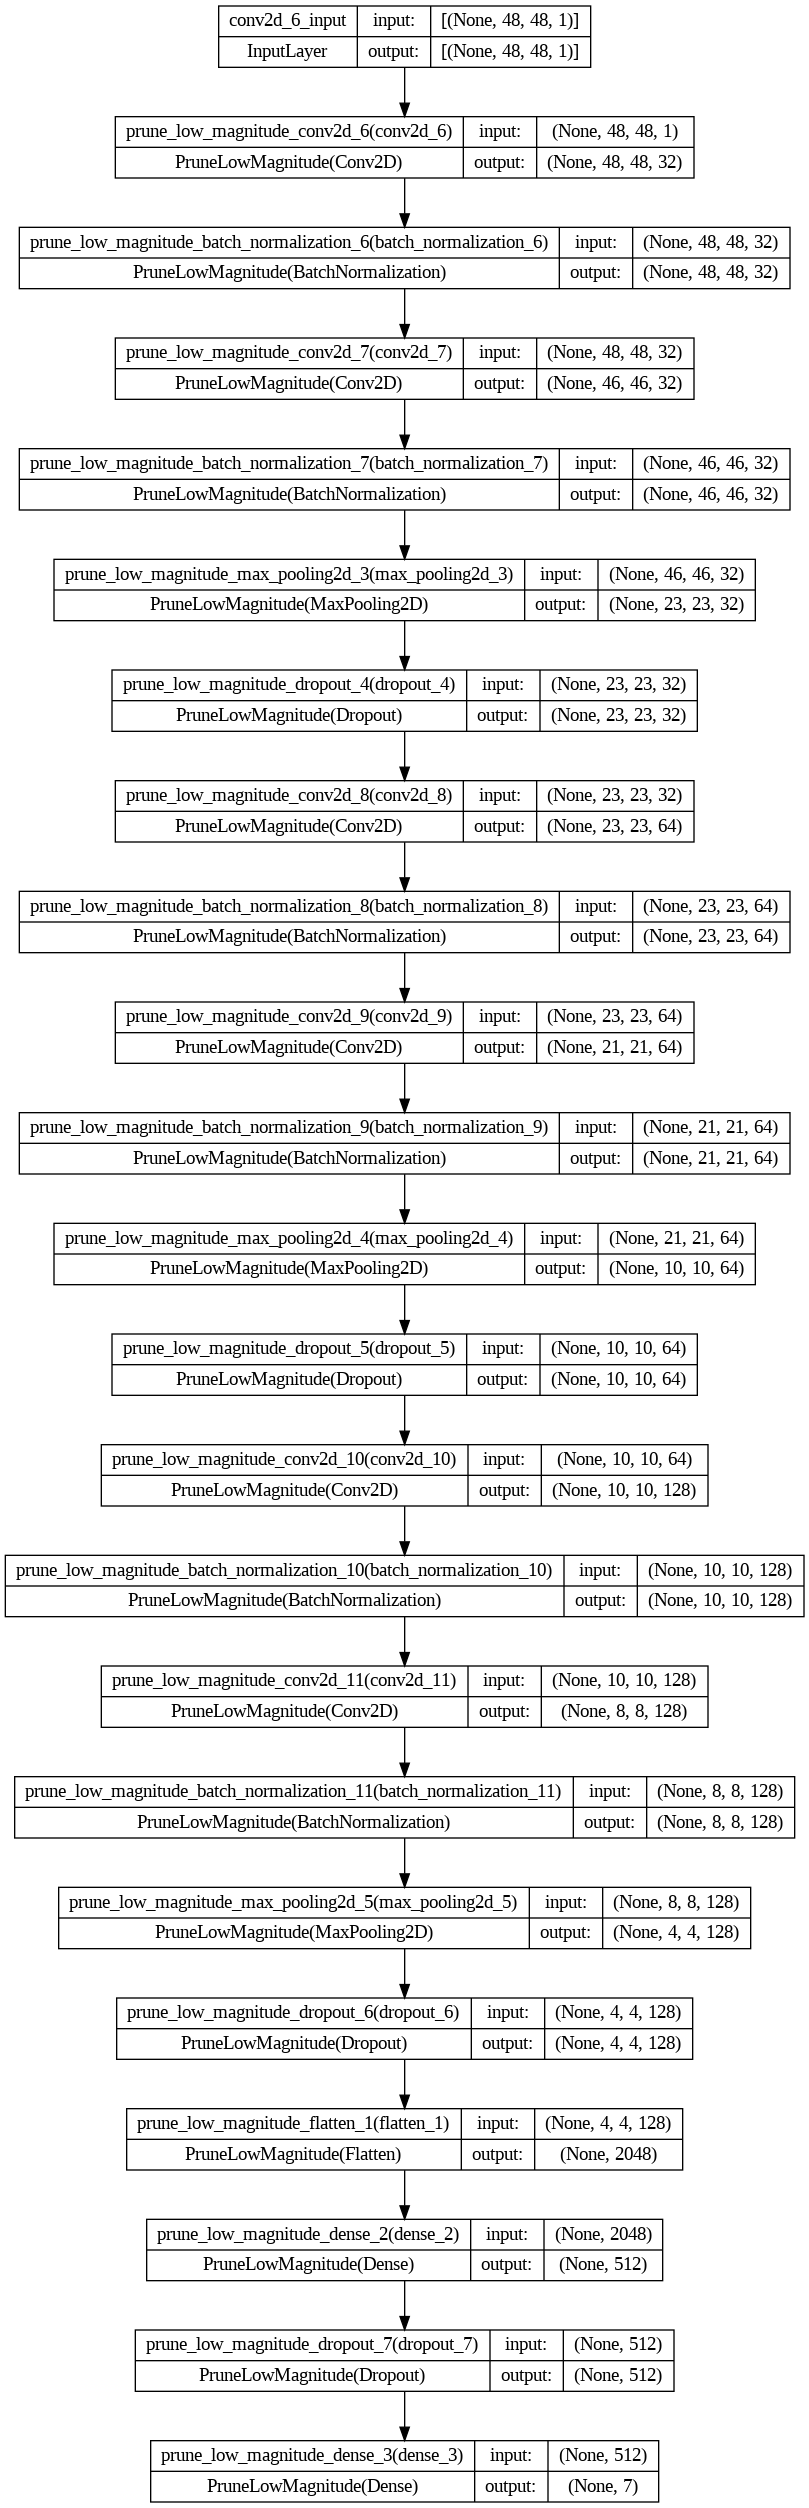

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(pruned_model, to_file="/content/drive/My Drive/EdgeAI/Results/emotion_architecture_pruning.png", show_shapes=True, show_layer_names=True)


In [ ]:
import tensorflow_model_optimization as tfmot

pruned_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

pruning_callback = tfmot.sparsity.keras.UpdatePruningStep()


final_pruned_cnn_history = pruned_model.fit(
    train_data,
    train_labels_one_hot,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[pruning_callback],
    verbose=1,
    validation_data=(val_data, val_labels_one_hot)
)

train_loss = final_pruned_cnn_history.history['loss']
val_loss = final_pruned_cnn_history.history['val_loss']
train_accuracy = final_pruned_cnn_history.history['accuracy']
val_accuracy = final_pruned_cnn_history.history['val_accuracy']

print("Train Loss:", train_loss)
print("Validation Loss:", val_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


Epoch 1/20
225/225 [==============================] - 47s 176ms/step - loss: 1.9040 - accuracy: 0.2992 - val_loss: 2.0808 - val_accuracy: 0.1984
Epoch 2/20
225/225 [==============================] - 38s 170ms/step - loss: 1.5640 - accuracy: 0.3839 - val_loss: 1.8343 - val_accuracy: 0.2903
Epoch 3/20
225/225 [==============================] - 38s 170ms/step - loss: 1.4527 - accuracy: 0.4355 - val_loss: 1.4021 - val_accuracy: 0.4517
Epoch 4/20
225/225 [==============================] - 38s 170ms/step - loss: 1.3764 - accuracy: 0.4672 - val_loss: 1.4001 - val_accuracy: 0.4606
Epoch 5/20
225/225 [==============================] - 38s 169ms/step - loss: 1.3203 - accuracy: 0.4862 - val_loss: 1.3215 - val_accuracy: 0.4848
Epoch 6/20
225/225 [==============================] - 38s 169ms/step - loss: 1.2728 - accuracy: 0.5126 - val_loss: 1.2423 - val_accuracy: 0.5205
Epoch 7/20
225/225 [==============================] - 38s 169ms/step - loss: 1.2366 - accuracy: 0.5203 - val_loss: 1.2065 - val_ac

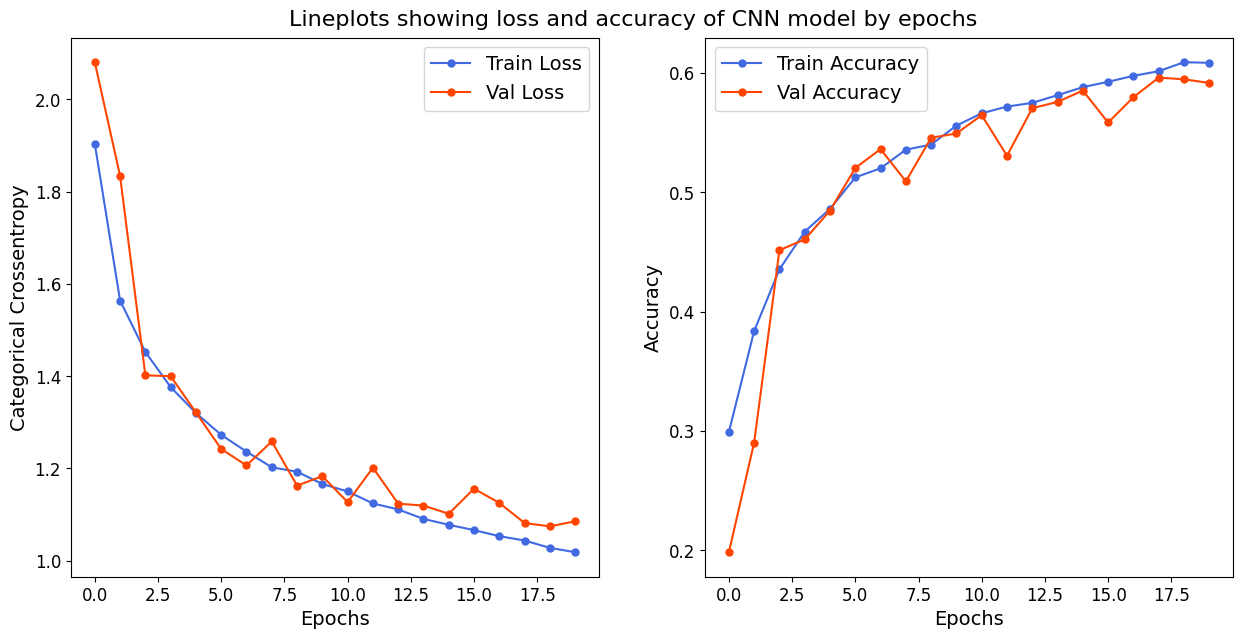

In [ ]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(val_loss, label='Val Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(val_accuracy, label='Val Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

# Exporting plot image in PNG format.
plt.savefig('/content/drive/My Drive/EdgeAI/Results/Logs/TFN3_final_pruned_emotion_final_cnn_loss_accuracy.png', bbox_inches='tight');

## Save Model

In [42]:
# Strip the pruning wrappers
pruned_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

# Save the pruned model
pruned_model.save('/content/drive/My Drive/EdgeAI/Results/TFN3_final_emotion_pruned_model.keras')


In [43]:
# Convert the pruned model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(pruned_model)
tflite_model = converter.convert()

# Save the TFLite model
with open('/content/drive/My Drive/EdgeAI/Results/TFN3_final_emotion_pruned_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:

# Convert the pruned model to TFLite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(pruned_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  
tflite_quantized_pruned_model = converter.convert()

# Save the quantized TFLite model
with open('/content/drive/My Drive/EdgeAI/Results/TFN3_final_emotion_pruned_quantized_model.tflite', 'wb') as f:
    f.write(tflite_quantized_pruned_model)


## Evaluate Model

In [ ]:
pruned_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

final_cnn_score = pruned_model.evaluate(test_data, test_labels_one_hot, verbose=1)


113/113 [==============================] - 2s 17ms/step - loss: 1.0494 - accuracy: 0.6052


In [ ]:
# evaluate pruned and quantizied

import tensorflow as tf
import numpy as np
from tensorflow.keras.losses import CategoricalCrossentropy

def evaluate_tflite_model(tflite_model_path, test_data, test_labels):
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Initialize counters for accuracy and loss calculation
    correct_predictions = 0
    total_loss = 0
    total_samples = len(test_data)

    # Define the loss function (Categorical Crossentropy for multi-class classification)
    loss_fn = CategoricalCrossentropy()

    # Loop through each sample in the test set
    for i in range(total_samples):
        # Prepare the input data
        input_data = np.expand_dims(test_data[i], axis=0).astype(np.float32)  # Ensure dtype is compatible
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference
        interpreter.invoke()

        # Get the model's prediction
        output = interpreter.get_tensor(output_details[0]['index'])
        predicted_label = np.argmax(output)  # Predicted class
        true_label = np.argmax(test_labels[i])  # True class

        # Calculate accuracy
        if predicted_label == true_label:
            correct_predictions += 1

        # Calculate loss for the sample
        total_loss += loss_fn(test_labels[i:i+1], output).numpy()

    # Calculate average accuracy and loss
    accuracy = correct_predictions / total_samples
    average_loss = total_loss / total_samples

    print(f"Accuracy on test set (pruned + quant): {accuracy}")
    print(f"Loss on test set (pruned + quant): {average_loss}")

    return accuracy, average_loss


accuracy, avg_loss = evaluate_tflite_model(
    tflite_model_path='/content/drive/My Drive/EdgeAI/Results/TFN3_final_emotion_pruned_quantized_model.tflite',
    test_data=test_data,
    test_labels=test_labels_one_hot
)


Accuracy on test set (pruned + quant): 0.6046252438005015
Loss on test set (pruned + quant): 1.0490869250974983
